In [72]:
%cd D:\baiyu\project\python\wcnc
%matplotlib notebook

import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Numpy version ' + np.__version__)

D:\baiyu\project\python\wcnc
Python version 3.6.1 (v3.6.1:69c0db5, Mar 21 2017, 18:41:36) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.19.2
Matplotlib version 2.0.0
Numpy version 1.11.3


Beam number:  [ 3  6 12 18]
Beam Class:   ['Beam' 'NormalBean' 'StaticBeam']


<IPython.core.display.Javascript object>


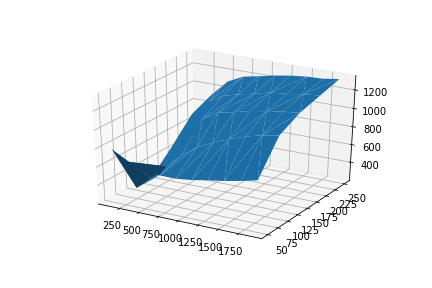

<IPython.core.display.Javascript object>


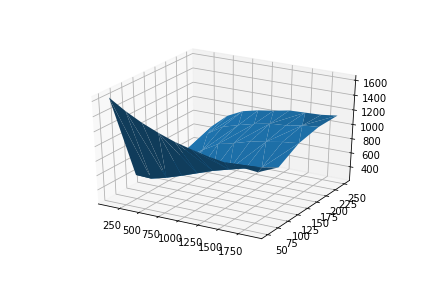

In [76]:
db_filename = 'thesis.db'
with sqlite3.connect(db_filename) as conn:
    df = pd.read_sql_query("SELECT * from task", conn)

# print(df.dtypes)
ue_l = df['ue_num'].unique()
enb_l = df['d_enb'].unique()
beam_l = df['beam_num'].unique()
cls_l = df['beam_class'].unique()

print('Beam number: ', beam_l)
print('Beam Class:  ', cls_l)

# ax = plt.gca(projection='3d')
d = df[(df['beam_num']==6) & (df['beam_class']=='Beam')]
d2 = df[(df['beam_num']==12) & (df['beam_class']=='Beam')]

ax = plt.gca(projection='3d')
ax.plot_trisurf(d['ue_num'], d['d_enb'], d['tx_power'])
fig = plt.figure()
bx = fig.gca(projection='3d')
bx.plot_trisurf(d2['ue_num'], d2['d_enb'], d2['tx_power'])

In [ ]:
db_filename = 'thesis.db'
sql='''

'''
with sqlite3.connect(db_filename) as conn:
    df = pd.read_sql_query("SELECT * from task", conn)


<IPython.core.display.Javascript object>


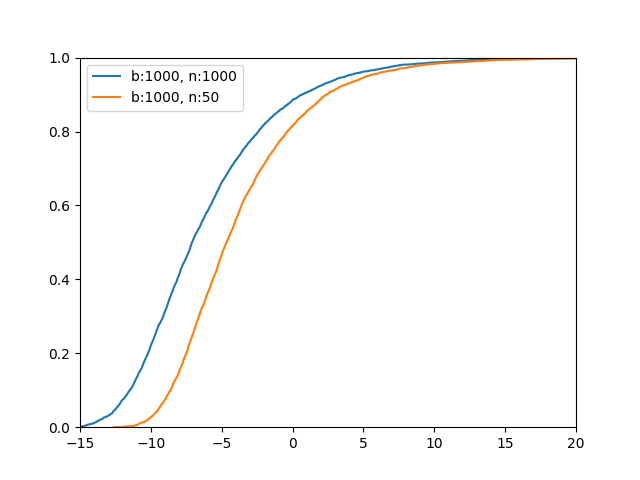

In [63]:
boundary = 1000
number = 1000
sinr1 = []

for x in range(5000):
    x = boundary * (np.random.rand(number) - 0.5)
    y = boundary * (np.random.rand(number) - 0.5)
    d = np.sqrt(x**2 + y **2)
    rx = np.power(d, -2)
    signal = np.max(rx)
    interf = np.sum(rx) - signal
    sinr1.append(10*np.log10(signal/interf))
plt.plot(np.sort(sinr1), np.linspace(0, 1, len(sinr1)), label='b:{}, n:{}'.format(boundary, number))

boundary = 1000
number = 50
sinr = []

for x in range(5000):
    x = boundary * (np.random.rand(number) - 0.5)
    y = boundary * (np.random.rand(number) - 0.5)
    d = np.sqrt(x**2 + y **2)
    rx = np.power(d, -2)
    signal = np.max(rx)
    interf = np.sum(rx) - signal
    sinr.append(10*np.log10(signal/interf))
plt.plot(np.sort(sinr), np.linspace(0, 1, len(sinr)), label='b:{}, n:{}'.format(boundary, number))
plt.xlim([-15, 20])
plt.ylim([0, 1])
plt.legend()

<IPython.core.display.Javascript object>


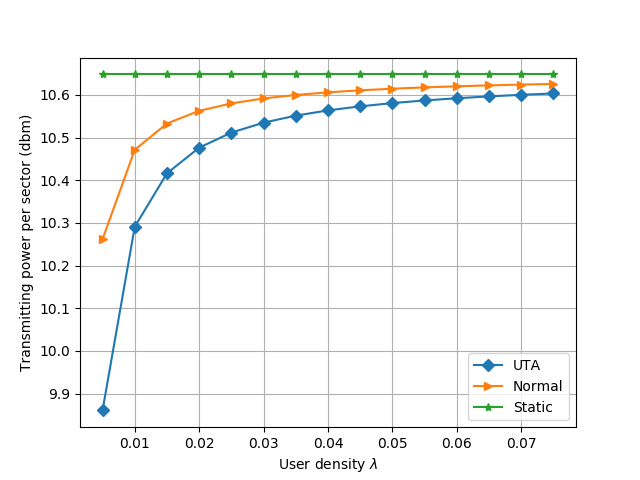

In [115]:
import csv, os
# %cd E:\Software\Winpy\WinPython-64bit-3.6.1.0Qt5\notebooks

with open(r'E:\Software\Winpy\WinPython-64bit-3.6.1.0Qt5\notebooks\thesis.csv', 'r') as f:
    cont = csv.reader(f)
    tmp = [x for x in cont]
tmp.pop(0)
data = np.array(tmp, dtype=np.float)
data=10*np.log10(data)
x = np.linspace(5000,75000,15)/1000000

plt.plot(x, data[:,0], label='UTA', marker='D')
plt.plot(x, data[:,1], label='Normal', marker='>')
plt.plot(x, data[:,2], label='Static', marker='*')
plt.legend()
plt.grid()
plt.xlabel(u'User density $\lambda$')
plt.ylabel('Transmitting power per sector (dbm)')
plt.show()